# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Shnidman Approximation
***

Referring to Section 6.3.6, Shnidman  developed a set of equations, based on empirical data, for calculating the required signal-to-noise ratio for a specified probability of detection and probability of false alarm.  These equations are applicable to all of the Swerling target models for either a single pulse or the noncoherent integration of $N$ pulses. Shnidman's equation proceeds as follows.  First, the parameter $K$ is chosen based on the Swerling target type, then the parameter $\alpha$ is chosen based on the number of pulses as (Equation 6.45)

$$
    K = \begin{cases}
    \infty &\text{Swerling 0}\\
    1 &\text{Swerling I}\\
    N &\text{Swerling II}\\
    2 &\text{Swerling III}\\
    2N &\text{Swerling IV}
    \end{cases}, \hspace{0.4in}
    \alpha = \begin{cases}
    0 &N<40\\
    \frac{1}{4} &N\ge40
    \end{cases}.
$$

Then the two parameters $\eta$ and $X$ are computed from (Equation 6.46)

$$
    \eta = \sqrt{-0.8\ln(4 P_{fa}(1-P_{fa}))} + \text{sign}(P_d - 0.5)\sqrt{-0.8\ln(4 P_d(1-P_d))}
$$

and

$$
    X = \eta\Bigg[ \eta + 2\sqrt{\frac{N}{2} + \Big( \alpha - \frac{1}{4}\Big)} \,\Bigg].
$$

The following constants are now computed (Equation 6.48 - 6.51)

\begin{align}
    C_1 &= \left( \big[  (17.7006 P_d - 18.4496) P_d  + 14.5339\big]P_d - 3.525 \right) / K, \\ \nonumber \\
    C_2 &= \frac{1}{K}\bigg( \exp\big( 27.31 P_D - 25.14\big) + \big( P_d-0.8\big) \nonumber \\ &\hspace{1.5in}\times \left[ 0.7\ln\left( \frac{10^{-5}}{P_{fa}}\right) + \frac{(2N-20)}{80}\right]\bigg), \\ \nonumber \\
    C_{dB} &= \begin{cases} C_1 &\text{for}\hspace{5pt}0.1\le P_d \le 0.872,\\[5pt] C_1 + C_2 &\text{for}\hspace{5pt}0.872\le P_d \le 0.99,\end{cases} \\ \nonumber \\
    C &= 10^{(C_{dB}/10)}.\nonumber 
\end{align}

Finally, the signal-to-noise ratio is (Equation 6.52)

$$
    {SNR} = 10\log_{10}\left(\frac{C\cdot X}{N}\right) \hspace{0.5in} \text{(dB)}.
$$

Shnidman's equation has been shown to be accurate to within $0.5$ dB within the following bounds

$$
    0.1 \le \,P_d \le 0.99, \\ \nonumber \\
    10^{-9} \le \,P_{fa} \le 10^{-3}, \\ \nonumber \\
    1 \le \,N \le 10.
$$

Shnidman's equation is valid for all five Swerling target types.  Shnidman's equation provides accurate results for first cut type of radar system calculations.
***

Begin by getting the library path

In [1]:
import lib_path

Set the start and end probability of detection

In [2]:
pd_start = 0.8

pd_end = 0.99

Create the prbability of detection array using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace


pd_all = linspace(pd_start, pd_end, 200)

Set the probability of false alarm and the number_of_pulses

In [4]:
pfa = 1e-6

number_of_pulses = 10

Set the target type (Swerling 0 - Swerling 4)

In [5]:
target_type = 'Swerling 2'

Calculate the error in the Shnidman approximation of signal to noise using the `single_pulse_snr` and `signal_to_noise` routines

In [6]:
from Libs.detection.shnidman import signal_to_noise
from Libs.detection.non_coherent_integration import single_pulse_snr

from numpy import log10

error = [10.0 * log10(single_pulse_snr(p, pfa, number_of_pulses, target_type)) - signal_to_noise(p, pfa, number_of_pulses, target_type) for p in pd_all]

Display the error in the Shnidman approximation

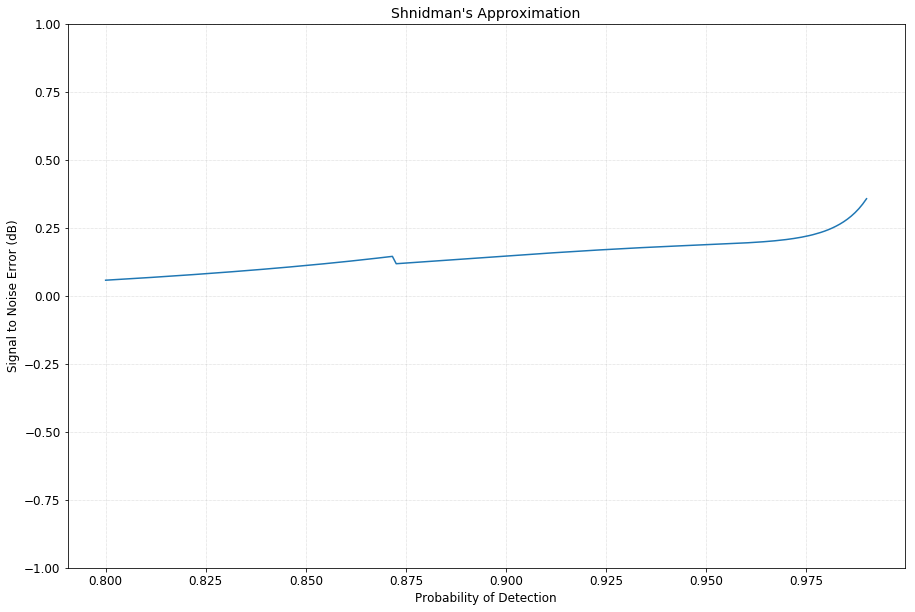

In [8]:
from matplotlib import pyplot as plt



# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(pd_all, error, '')



# Set the plot title and labels

plt.title('Shnidman\'s Approximation', size=14)

plt.xlabel('Probability of Detection', size=12)

plt.ylabel('Signal to Noise Error (dB)', size=12)

plt.ylim(-1, 1)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)